<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Lecture 12 Day 1</div>
<div style="text-align: right">Dino Konstantopoulos, 30 March 2020, with material from J. Nunez-Iglesias, L.R. Varshney, and the LibIgl team</div>

# What else can you do with Eigenvectors and Eigenvalues?

I told you that graphs are just a low-dimensional way of representing surfaces, We will continue exploring this concept. We will also learn to draw **surfaces**. The math in differential geometry can put you to sleep faster than Nyquil can, so we need to make it fun by plotting neat models, so we'll do that in this notebook. 

>**NOTE**: Surfaces are nothing more than higher-dimensional versions of the same 1D curves wew started with in class. And you know what data science is all about: You get some data, you take its histogram, and you try to represent that graph with some predefined math functions (that have parameters). If you are successful, you went back in time and uncovered the process that generated the data. Good job! Its parameters are all you need to go to the future and get wicked-low dimensional representations of your data. You can now predict a bunch of things. In 3D and above, it's much tougher to find mathematical functions to represent these surfaces. That is why we turn to graphs to draw them. The graphs are *not* the surface, they are a *way* to *draw* the surface. That's what your brain does. And that's what Neural Networks do.

When we're done learning to draw surfaces, we reproduce results from a scientific paper exploring the [connectome](https://en.wikipedia.org/wiki/Connectome) of a (small) brain, using the linear algebra tools we learned. 

<br />

<br />
The graph below is the graph of Wikipedia. Looks a bit like a brain!

<img src="https://upload.wikimedia.org/wikipedia/commons/9/90/Visualization_of_wiki_structure_using_prefuse_visualization_package.png" width=500>
<!-- caption text="Visualization of wikipedia structure. Created by Chris Davis and released under CC-BY-SA-3.0 (https://commons.wikimedia.org/wiki/GNU_Free_Documentation_License)." -->

## Compressed formats for NumPy arrays

We learned how to save big arrays as sparse arrays. But what if we have dense arrays? We need to learn how to save NumPy data in compressed formats. First we learn how to save in a **.CSV** File (ASCII), then in an **.NPY** File (binary), and then in an **.NPZ File** (compressed).

In .csv format, the array has a single row of data with 10 columns. We would expect this data to be saved to a CSV file as a single row of data.

In [15]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt
# define data
data = asarray([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
# save to csv file
savetxt('data/mysimpledata.csv', data, delimiter=',')

And here is how we load it back in:

In [16]:
# load numpy array from csv file
from numpy import loadtxt
# load array
data = loadtxt('data/mysimpledata.csv', delimiter=',')
# print the array
print(data)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


Sometimes we have a lot of data in NumPy arrays that we wish to save efficiently, but which we only need to use in another Python program. Therefore, we can save the NumPy arrays into a native binary format that is efficient to both save and load.

This is common for input data that has been prepared, such as transformed data, that will need to be used as the basis for testing a range of machine learning models in the future or running many experiments. The .npy file format is appropriate for this use case and is referred You can load this file as a NumPy array later using the load() function.to as simply **NumPy format**.

This can be achieved using the `save()` NumPy function and specifying the filename and the array that is to be saved.

In [17]:
# save numpy array as npy file
from numpy import asarray
from numpy import save
# define data
data = asarray([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
# save to npy file
save('data/mysimpledata.npy', data)

You can load this file as a NumPy array later using the `load()` function.

In [18]:
# load numpy array from npy file
from numpy import load
# load array
data = load('data/mysimpledata.npy')
# print the array
print(data)

[[0 1 2 3 4 5 6 7 8 9]]


Sometimes, we prepare data for modeling that needs to be reused across multiple experiments, but the data is large. This might be pre-processed NumPy arrays like a corpus of text (integers) or a collection of rescaled image data (pixels). In these cases, it is desirable to both save the data to file, but also in a compressed format. This allows gigabytes of data to be reduced to hundreds of megabytes and allows easy transmission to other servers of cloud computing for long algorithm runs.

The .npz file format is appropriate for this case and supports a compressed version of the native NumPy file format. The `savez_compressed()` NumPy function allows multiple NumPy arrays to be saved to a single compressed .npz file.

In [19]:
# save numpy array as npz file
from numpy import asarray
from numpy import savez_compressed
# define data
data = asarray([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
# save to npy file
savez_compressed('data/mysimpledata.npz', data)

We can load this file later using the same load() function from the previous section.

In this case, the `savez_compressed()` function supports saving multiple arrays to a single file. Therefore, the `load()` function may load multiple arrays.

The loaded arrays are returned from the `load()` function in a dict with the names ‘arr_0’ for the first array, ‘arr_1’ for the second, and so on.

In [ ]:
# load numpy array from npz file
from numpy import load
# load dict of arrays
dict_data = load('data/data.npz')
# extract the first array
data = dict_data['arr_0']
# print the array
print(data)

Ok, now that we know how to read and save data, let's plot it!

## Libigl

We need to learn how to plot graphs and manifolds!

`Libigl` is an open source C++ library for geometry processing research and development. Let's install the python bindings:

`Libigl` can be downloaded from [Conda forge](https://anaconda.org/conda-forge/igl):
```
conda install -c conda-forge igl 
```

All of `libigl` functionality depends only on `numpy` and `scipy`. I like simple!

For visualization, we will use [meshplot](https://anaconda.org/conda-forge/meshplot) which can also be easily installed from Conda:
```
conda install -c conda-forge meshplot 
```
Libigl uses `numpy` to encode vectors and matrices and `scipy` for sparse matrices. And we already know everything about both!

## Triangular Meshes with meshplot

A triangular [mesh](https://en.wikipedia.org/wiki/Types_of_mesh) is encoded as a pair of numpy matrices:

`v` is an $N$ by 3 matrix which stores the coordinates of the nodes (or vertices) of a graph. 
Each row stores the coordinate of a vertex, with its x, y and z coordinates in the first,
second and third column, respectively. 

The matrix `f` stores the triangle connectivity: each line of `f` denotes a triangle whose 3 vertices are
represented as indices pointing to rows of `f`.

Clear?

For example, here are two faces of a pyramid:

In [22]:
# conda install -c conda-forge igl 

In [23]:
# conda install -c conda-forge meshplot 

In [24]:
import numpy as np
import meshplot as mp

In [25]:
V = np.array([
    [0., 0, 1],
    [1, 0, 0],
    [0, 1, 0],
    [2, 1, 1]
])

F = np.array([
    [0, 1, 2],
    [1, 3, 2]
])

In [26]:
mp.plot(V, F)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(1.0, 0.5,…

You can zoom in and out by using your mouse's scroll bar, and rotate the manifold using your mouse! If you don't have a mouse, that will teach you to buy a mouse. You cannot do data science with a touch pad!

And here is a bunny as a bunch of triangles!

In [27]:
v: np.array
f: np.array
    
data = np.load('data/data.npz')
v, f, n, fs = data["v"], data["f"], data["n"], data["fs"]
v1, f1, v2, f2 = data["v1"], data["f1"], data["v2"], data["f2"]

In [28]:
mp.plot(v, f)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016860…

### Scalar field visualization

Colors and normals can be associated to faces or vertices using the same `plot` function with three parameters.

The key parameter `c` represents the vertex or face colors and can be one of the following:

1. A #v by 1 vector with one function value per vertex, which gets normalized and converted into vertex color values using the [viridis](https://matplotlib.org/examples/color/colormaps_reference.html) colormap.
2. A #v by 3 vector with RGB color values per vertex. The color values should be in the range 0.0-1.0.
3. A single color value for all vertices in the form of a numpy array [R, G, B] in the range 0.0-1.0.
4. A #f by 1 vector with one function value per face, which gets normalized and converted into face color values using the [viridis](https://matplotlib.org/examples/color/colormaps_reference.html) colormap.
5. A #f by 3 vector with RGB color values per face. The color values should be in the range 0.0-1.0.

The following four examples show vertex function colors (in this case just the y-coordinate), vertex normals as colors per vertex, random colors per face and face function colors (in this case the size of the faces):

In [29]:
d = mp.subplot(v, f, c=v[:, 1], s=[2, 2, 0])
mp.subplot(v, f, c=n, s=[2, 2, 1], data=d)
mp.subplot(v, f, c=np.random.rand(*f.shape), s=[2, 2, 2], data=d)
mp.subplot(v, f, c=fs, s=[2, 2, 3], data=d)

### Visualizing Point Clouds
We can also visualize point clouds, their properties and additional debugging information through the `plot` function, by just leaving the faces array empty:

In [30]:
mp.plot(v)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016860…

Similar to the surface plot, we can also set color values for all points in the point cloud. This can be done either by passing function values or directly by passing colors:

In [31]:
d = mp.subplot(v, c=v[:, 1], s=[1, 2, 0], shading={"point_size": 0.03})
mp.subplot(v, c=np.random.rand(*v.shape), s=[1, 2, 1], data=d, shading={"point_size": 0.03})

### Overlays, Textures and Shading

In addition to plotting the surface, the viewer supports the visualization of bounding boxes, points and lines. These overlays can be very helpful while developing geometric processing algorithms to plot debug information.

The following example draws a point of a given color for each row of `v_box`. The point is placed at the coordinates specified in each row of `v_box`, which is a #v_box by 3 matrix.
In addition, edges of a given color are drawn for the vertices `v_box` with the indices `f_box`:

In [32]:
m = np.min(v, axis=0)
ma = np.max(v, axis=0)

# Corners of the bounding box
v_box = np.array([[m[0], m[1], m[2]], [ma[0], m[1], m[2]], [ma[0], ma[1], m[2]], [m[0], ma[1], m[2]],
                  [m[0], m[1], ma[2]], [ma[0], m[1], ma[2]], [ma[0], ma[1], ma[2]], [m[0], ma[1], ma[2]]])

# Edges of the bounding box
f_box = np.array([[0, 1], [1, 2], [2, 3], [3, 0], [4, 5], [5, 6], [6, 7], 
                  [7, 4], [0, 4], [1, 5], [2, 6], [7, 3]], dtype=np.int)

p = mp.plot(v, f, return_plot=True)

p.add_edges(v_box, f_box, shading={"line_color": "red"});
p.add_points(v_box, shading={"point_color": "green"})

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016860…

2

### Events and Widgets

The viewer supports to use interactive widgets from the [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/user_guide.html) package to manipulate the plot. 

Remember the `v1`'s and `f1`'s we loaded with the bunny data? We actually loaded a bunch of other pictures in the same compressed file!

In [33]:
v = [v1, v2]
f = [f1, f2]
p = mp.plot(v1, f1, return_plot=True)

@mp.interact(mesh=[('bump', 0), ('fertility', 1)])
def ff(mesh):
    mp.plot(v[mesh], f[mesh], plot=p)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0, 0.0,…

interactive(children=(Dropdown(description='mesh', options=(('bump', 0), ('fertility', 1)), value=0), Output()…

### Offline Plotting

Besides interactive plotting in Jupyter Notebooks, `meshplot` supports to plot objects in offline html pages. The offline mode is automatically selected, if `meshplot` is run outside of a Jupyter Notebook. Within Jupyter Notebooks, one can manually switch to offline mode as follows:

In [34]:
mp.offline()
mp.plot(v1, f1, c=v1[:, 1])

Plot saved to file aef566af-207e-4bcf-9ec1-d6dbe47cb73c.html.


Without parameters, the plot is stored with the name `<UUID>.html`. It is possible to save Jupyter plots after they are generated and to chose the filename as follows:

In [35]:
mp.jupyter()
p = mp.plot(v1, f1, c=np.random.rand(*f1.shape), return_plot=True)
p.add_mesh(v1 + 5, f1, c=v1[:,1]);
p.add_points(v1 - 5, c=v1[:,2], shading={"point_size": 1.0})
p.save("test.html")

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0, 0.0,…

Plot saved to file test.html.


## More refined mesh data with igl

`Libigl` provides input and output functions to read and write many common mesh formats.
The IO functions are `igl.read_\*` and `igl.write_\*`.

Reading a mesh from a file requires a single libigl function call. Here, we read in our bunny in `off` format:

In [36]:
pwd

'/Users/CYH/Desktop/DataScienceWithMachineLearning/LECTURE/Lecture12-Day1-Graphs as Learning Models'

In [39]:
import igl as ig

## Load a mesh in OFF format
v, f = ig.read_triangle_mesh('data/bunny.off')

## Print the vertices and faces matrices 
#print("Vertices: ", len(v))
#print("Faces: ", len(f))

mp.plot(v, f)

ValueError: File 'data/bunny.off' not found.

And here's a cow if you don‘t like bunnies:

In [40]:
## Load a mesh in OFF format
v, f = ig.read_triangle_mesh('data/cow.off')

## Print the vertices and faces matrices 
#print("Vertices: ", len(v))
#print("Faces: ", len(f))

mp.plot(v, f)

ValueError: File 'data/cow.off' not found.

Or a teapot:

In [115]:
## Load a mesh in OFF format
v, f = ig.read_triangle_mesh('data/teapot.off')

## Print the vertices and faces matrices 
#print("Vertices: ", len(v))
#print("Faces: ", len(f))

mp.plot(v, f)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.2170000…

Teapots are very famous in graphics processing. Computer graphic processing was invented using [teapots](https://en.wikipedia.org/wiki/Utah_teapot). It is the `Hello World` of graphics programming!

This igl function reads the mesh bumpy.off and returns the `v` and `f` matrices.
Similarly, a mesh can be written to an OBJ file using:

In [116]:
import os 

In [117]:
# Save the mesh in OBJ format
ret = ig.write_triangle_mesh(os.path.join(root_folder, "data", "bunny_out.obj"), v, f)

NameError: name 'root_folder' is not defined

# Discrete Differential Geometric Quantities and Operators

### Gaussian curvature

[Gaussian curvature](https://en.wikipedia.org/wiki/Gaussian_curvature) on a continuous surface is defined as the **product** of the [principal curvatures](https://en.wikipedia.org/wiki/Principal_curvature):

 $k_G = k_1 k_2.$

As an _intrinsic_ measure, it depends on the metric and not the surface's embedding.

>**DEFINITION**: In differential geometry, the two principal curvatures at a given point of a surface are the **eigenvalues** of the [shape operator](https://en.wikipedia.org/wiki/Differential_geometry_of_surfaces#Shape_operator) at the point and the principal directions are its **eigenvectors**. They measure how the surface bends by different amounts in different directions at that point.

Intuitively, Gaussian curvature tells how locally spherical or _elliptic_ (`yellow`) the
surface is ( $k_G>0$ ), how locally saddle-shaped or _hyperbolic_ the surface
is ( $k_G<0$ ), or how locally cylindrical or _parabolic_ (`blue`) ( $k_G=0$ ) the
surface is.

Think yellow for [convex](https://en.wikipedia.org/wiki/Convex_set) shapes, and blue for [concave](https://en.wikipedia.org/wiki/Convex_set#Non-convex_set) shapes.

In the discrete setting, one definition for a "discrete Gaussian curvature"
on a triangle mesh is via a vertex's _angular deficit_:

 $k_G(v_i) = 2π - \sum\limits_{j\in N(i)}θ_{ij},$

where $N(i)$ are the triangles incident on vertex $i$ and $θ_{ij}$ is the angle
at vertex $i$ in triangle $j$ <cite data-cite="meyer2003">(Meyer, 2003)</cite>.

Just like the continuous analog, our discrete Gaussian curvature reveals
elliptic, hyperbolic and parabolic vertices on the domain.

Let's compute Gaussian curvature and visualize it in pseudocolor. First, calculate the curvature with libigl and then plot it in pseudocolors.

In [118]:
v, f = ig.read_triangle_mesh('data/bumpy.off')
k = ig.gaussian_curvature(v, f)
mp.plot(v, f, k)

ValueError: File 'data/bumpy.off' not found.

### Mean curvature
The two principal curvatures $(k_1,k_2)$ at a point on a surface measure how
much the surface bends in different directions. The directions of maximum and
minimum (signed) bending are called principal directions and are always
orthogonal.

[Mean curvature](https://en.wikipedia.org/wiki/Mean_curvature) is defined as the **average** of the [principal curvatures](https://en.wikipedia.org/wiki/Principal_curvature):

 $H = \frac{1}{2}(k_1 + k_2).$

One way to extract mean curvature is by examining the Laplace-Beltrami operator
applied to the surface positions. The result is a so-called mean-curvature
normal:

  $-\Delta \mathbf{x} = H \mathbf{n}.$

It is easy to compute this on a discrete triangle mesh in libigl using the
cotangent Laplace-Beltrami operator <cite data-cite="meyer2003">(Meyer, 2003)</cite>. 

In [119]:
import scipy as sp

l = ig.cotmatrix(v, f)
m = ig.massmatrix(v, f, ig.MASSMATRIX_TYPE_VORONOI)

minv = sp.sparse.diags(1 / m.diagonal())

hn = -minv.dot(l.dot(v))
h = np.linalg.norm(hn, axis=1)
mp. plot(v, f, h)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.2170000…

mean curvature captures areas of extreme curvature more than gaussian curvature. Gaussian curavgure captures convexithyh and concavity better.

## Professor, why are we studying curvature in a data science class?

Because curvature is one way your brain can store knowledge, as geometry (using graphs to build the geometry). That geometry is probably scale-invariant. So think scalable vector graphics, not raster graphics. Your brain's surfaces  represents memory and models. 

## Principal directions

A robust method for determining principal curvatures is via quadric fitting  <cite data-cite="panozzo2010">(Panozzo, 2010)</cite>. In the neighborhood around every vertex, a best-fit quadric is found and principal curvature values and directions are analytically computed on this quadric.

Of course, when you draw surfaces with triangular meshes, the principal directions are very straightforward: They are the edges of every vertex. If the vertex connects to more than one triangle, it will have many principal directions.

In [120]:
v1, v2, k1, k2 = ig.principal_curvature(v, f)
h2 = 0.5 * (k1 + k2)
p = mp.plot(v, f, h2, shading={"wireframe": False}, return_plot=True)

avg = ig.avg_edge_length(v, f) / 2.0
p.add_lines(v + v1 * avg, v - v1 * avg, shading={"line_color": "red"})
p.add_lines(v + v2 * avg, v - v2 * avg, shading={"line_color": "green"});

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.2170000…

According to the creator of the character, Eduard Uspensky (1965), [Cheburashka](https://en.wikipedia.org/wiki/Cheburashka) is an *animal unknown to science*, with large monkey-like ears and a body resembling that of a cub, who lives in a tropical forest. He accidentally gets into a crate of oranges, eats his fill, and falls asleep. 

Of course, Cheburashka is not very unknown to *us*. We know him well as a cross between `Pikachu` and `Gengar` from [Pokemon]((https://www.ranker.com/list/complete-list-of-all-pokemon-characters/video-game-info)). What do you think?

In [121]:
v, f = ig.read_triangle_mesh('data/cheburashka.off')
u = ig.read_dmat('data/cheburashka-scalar.dmat')

g = ig.grad(v, f)
gu = g.dot(u).reshape(f.shape, order="F")

gu_mag = np.linalg.norm(gu, axis=1)
p = mp.plot(v, f, u, shading={"wireframe":False}, return_plot=True)

max_size = ig.avg_edge_length(v, f) / np.mean(gu_mag)
bc = ig.barycenter(v, f)
bcn = bc + max_size * gu
p.add_lines(bc, bcn, shading={"line_color": "black"});

ValueError: File 'data/cheburashka.off' not found.

### Gradient

How did we give Cheburashka hairs? Using gradients!

Scalar functions on a surface can be discretized as a piecewise linear function
with values defined at each mesh vertex:

$f(\mathbf{x}) \approx \sum\limits_{i=1}^n \phi_i(\mathbf{x})\, f_i,$

where $\phi_i$ is a piecewise linear hat function defined by the mesh so that
for each triangle $\phi_i$ is _the_ linear function which is one only at
vertex $i$ and zero at the other corners.

![Hat function $\phi_i$ is one at vertex $i$, zero at all other vertices, and linear on incident triangles.](ipynb.images/hat-function.jpg)

Thus gradients of such piecewise linear functions are simply sums of gradients
of the hat functions:

 $\nabla f(\mathbf{x}) \approx
 \nabla \sum\limits_{i=1}^n \phi_i(\mathbf{x})\, f_i =
 \sum\limits_{i=1}^n \nabla \phi_i(\mathbf{x})\, f_i.$

This reveals that the gradient is a linear function of the vector of $f_i$
values. Because the $\phi_i$ are linear in each triangle, their gradients are
_constant_ in each triangle. Thus our discrete gradient operator can be written
as a matrix multiplication taking vertex values to triangle values:

 $\nabla f \approx \mathbf{G}\,\mathbf{f},$

where $\mathbf{f}$ is $n\times 1$ and $\mathbf{G}$ is an $md\times n$ sparse
matrix. This matrix $\mathbf{G}$ can be derived geometrically <cite data-cite="jacobson2013">(Jacobson, 2013)</cite>.

Libigl's `grad` function computes $\mathbf{G}$ for
triangle and tetrahedral meshes. 
Let's see how this works. First load a mesh and a corresponding surface function.
Next, compute the gradient operator g (#F*3 x #V) on the triangle mesh, apply it to the surface function and extract the magnitude.

### Laplacian

And now we're ready for the [Laplacian](https://en.wikipedia.org/wiki/Laplace_operator)!

The discrete Laplacian is an essential geometry processing tool. Many
interpretations and flavors of the Laplace and Laplace-Beltrami operator exist.

In open Euclidean space, the _Laplace_ operator is the usual divergence of
gradient (or equivalently the Laplacian of a function is the trace of its
Hessian):

 $\Delta f =
 \frac{\partial^2 f}{\partial x^2} +
 \frac{\partial^2 f}{\partial y^2} +
 \frac{\partial^2 f}{\partial z^2}.$

The _Laplace-Beltrami_ operator generalizes this to surfaces.

When considering piecewise-linear functions on a triangle mesh, a discrete
Laplacian may be derived in a variety of ways. The most popular in geometry
processing is the so-called "cotangent Laplacian" $\mathbf{L}$, arising
simultaneously from [FEM](https://en.wikipedia.org/wiki/Finite_element_method), [DEC](https://en.wikipedia.org/wiki/Discrete_exterior_calculus) and applying divergence theorem to vertex
one-rings. As a linear operator taking vertex values to vertex values, the
Laplacian $\mathbf{L}$ is a $n\times n$ matrix with elements:

$L_{ij} = \begin{cases}j \in N(i) &\cot \alpha_{ij} + \cot \beta_{ij},\\
j \notin N(i) & 0,\\
i = j & -\sum\limits_{k\neq i} L_{ik},
\end{cases}$

where $N(i)$ are the vertices adjacent to (neighboring) vertex $i$, and
$\alpha_{ij},\beta_{ij}$ are the angles opposite to edge ${ij}$.

Libigl implements discrete "cotangent Laplacians" for triangles meshes and
tetrahedral meshes, building both with fast geometric rules rather than "by the
book" FEM construction which involves many (small) matrix inversions <cite data-cite="sharf_2007">(Sharf, 2007)</cite>.

Here, I load a triangle mesh and then calculate the Laplace-Beltrami operator and visualize the normals as pseudocolors. But I have some bugs and have not been able to finish this on time for today.

In [122]:
from scipy.sparse.linalg import spsolve

v, f = ig.read_triangle_mesh('data/cow.off')
l = ig.cotmatrix(v, f)

n = ig.per_vertex_normals(v, f)*0.5+0.5
c = np.linalg.norm(n, axis=1)
p = mp.plot(v, f, c, shading={"wireframe": False}, return_plot=True)

vs = [v]
cs = [c]
for i in range(10):
    m = ig.massmatrix(v, f, ig.MASSMATRIX_TYPE_BARYCENTRIC)
    s = (m - 0.001 * l)
    b = m.dot(v)
    v = spsolve(s, m.dot(v))
    n = ig.per_vertex_normals(v, f)*0.5+0.5
    c = np.linalg.norm(n, axis=1)
    vs.append(v)
    cs.append(c)

@mp.interact(level=(0, 9))
def mcf(level=0):
    p.update_object(vertices=vs[level], colors=cs[level])

ValueError: File 'data/cow.off' not found.

In [68]:
from scipy.sparse.linalg import spsolve

v, f = ig.read_triangle_mesh('data/cow.off')

## Find boundary vertices
e = ig.boundary_facets(f)
v_b = np.unique(e)

## List of all vertex indices
v_all = np.arange(v.shape[0])

## List of interior indices
v_in = np.setdiff1d(v_all, v_b)

## Construct and slice up Laplacian
l = ig.cotmatrix(v, f)
l_ii = l[v_in, :]
l_ii = l_ii[:, v_in]

l_ib = l[v_in, :]
l_ib = l_ib[:, v_b]

## Dirichlet boundary conditions from z-coordinate
z = v[:, 2]
bc = z[v_b]

## Solve PDE
z_in = spsolve(-l_ii, l_ib.dot(bc))

mp.plot(v, f, z)

ValueError: File 'data/cow.off' not found.

In [69]:
v, f = ig.read_triangle_mesh('data/cheburashka.off')

## Two fixed points: Left hand, left foot should have values 1 and -1
b = np.array([4331, 5957])
bc = np.array([1., -1.])
B = np.zeros((v.shape[0], 1))

## Construct Laplacian and mass matrix
L = ig.cotmatrix(v, f)
M = ig.massmatrix(v, f, ig.MASSMATRIX_TYPE_VORONOI)
Minv = sp.sparse.diags(1 / M.diagonal())

## Bi-Laplacian
Q = L @ (Minv @ L)

## Solve with only equality constraints
Aeq = sp.sparse.csc_matrix((0, 0))
Beq = np.array([])
_, z1 = ig.min_quad_with_fixed(Q, B, b, bc, Aeq, Beq, True)

## Solve with equality and linear constraints
Aeq = sp.sparse.csc_matrix((1, v.shape[0]))
Aeq[0,6074] = 1
Aeq[0, 6523] = -1
Beq = np.array([0.])
_, z2 = ig.min_quad_with_fixed(Q, B, b, bc, Aeq, Beq, True)

## Normalize colors to same range
min_z = min(np.min(z1), np.min(z2))
max_z = max(np.max(z1), np.max(z2))
z = [(z1 - min_z) / (max_z - min_z), (z2 - min_z) / (max_z - min_z)]

## Plot the functions
p = mp.plot(v, f, z1, shading={"wireframe":False}, return_plot=True)

@mp.interact(function=[('z0', 0), ('z1', 1)])
def sf(function):
    p.update_object(colors=z[function])

ValueError: File 'data/cheburashka.off' not found.

### Eigen Decomposition

Libigl has rudimentary support for extracting eigen pairs of a generalized
eigen value problem:

 $Ax = \lambda B x$

where $A$ is a sparse symmetric matrix and $B$ is a sparse positive definite
matrix. Most commonly in geometry processing, we let $A=L$ the cotangent
Laplacian and $B=M$ the per-vertex mass matrix <cite data-cite="vallet_2008">(Vallet, 2008)</cite>.
Typically applications will make use of the _low frequency_ eigen modes.
Analogous to the Fourier decomposition, a function $f$ on a surface can be
represented via its spectral decomposition of the eigen modes of the
Laplace-Beltrami:

 $f = \sum\limits_{i=1}^\infty a_i \phi_i$

where each $\phi_i$ is an eigen function satisfying: $\Delta \phi_i = \lambda_i
\phi_i$ and $a_i$ are scalar coefficients. For a discrete triangle mesh, a
completely analogous decomposition exists, albeit with finite sum:

 $\mathbf{f} = \sum\limits_{i=1}^n a_i \phi_i$

where now a column vector of values at vertices $\mathbf{f} \in \mathcal{R}^n$
specifies a piecewise linear function and $\phi_i \in \mathcal{R}^n$ is an
eigen vector satisfying:

$\mathbf{L} \phi_i = \lambda_i \mathbf{M} \phi_i$.

Note that Vallet &amp; Levy <cite data-cite="vallet_2008">(Vallet, 2008)</cite> propose solving a symmetrized
_standard_ eigen problem $\mathbf{M}^{-1/2}\mathbf{L}\mathbf{M}^{-1/2} \phi_i
= \lambda_i \phi_i$. Libigl implements a generalized eigen problem solver so
this unnecessary symmetrization can be avoided.

Often the sum above is _truncated_ to the first $k$ eigen vectors. If the low
frequency modes are chosen, i.e. those corresponding to small $\lambda_i$
values, then this truncation effectively _regularizes_ $\mathbf{f}$ to smooth,
slowly changing functions over the mesh <cite data-cite="hildebrandt_2011">(Hildebrandt, 2011)</cite>. Modal
analysis and model subspaces have been used frequently in real-time deformation
<cite data-cite="barbic_2012">(Barbic, 2005)</cite>.

In the following example, the first k eigen vectors of the discrete Laplace-Beltrami operator are computed and displayed in
pseudocolors atop our cow. 

Low frequency eigenvectors of the discrete Laplace-Beltrami operator vary smoothly and slowly over the model.
At first, calculate the Laplace-Betrami operator and solve the generalized Eigenproblem with scipy/arpack. 
Then, rescale the Eigenvectors and visualize them. We do this on Cheburashka.

In [70]:
v, f = ig.read_triangle_mesh('data/cheburashka.off')
l = -ig.cotmatrix(v, f)
m = ig.massmatrix(v, f, ig.MASSMATRIX_TYPE_VORONOI)

k = 10
d, u = sp.sparse.linalg.eigsh(l, k, m, sigma=0, which="LM")

u = (u - np.min(u)) / (np.max(u) - np.min(u))
bbd = 0.5 * np.linalg.norm(np.max(v, axis=0) - np.min(v, axis=0))

p = mp.plot(v, f, bbd * u[:, 0], shading={"wireframe":False, "flat": False}, return_plot=True)

@mp.interact(ev=[("EV %i"%i, i) for i in range(k)])
def sf(ev):
    p.update_object(colors=u[:, ev])

ValueError: File 'data/cheburashka.off' not found.

These demos are meant to show you that eigenvectors can actually be *viewed*.

# Advanced Linear Algebra: Laplacian matrix of a graph

Remember what an **adjacency matrix** ise? If you number the nodes of the graph from $0$
to $n-1$, and place a 1 in row $i$, column $j$ of the matrix whenever there is
an edge from node $i$ to node $j$, that's your graph's adjacency matrix. In other words, if we call the adjacency
matrix $A$, then $A_{i, j} = 1$ if and only if the edge $(i, j)$ is in $G$.

The *degree* of a node is the number of edges touching it. For
example, if a node is connected to five other nodes in a graph, its degree
is 5. In adjacency matrix terms, the degree corresponds to the *sum*
of the values in a row or column. If the graph is not directed, the adjacency matrix is symmetrix (its transpose is the matrix itself). If the graph is directed, then you have **in-degrees** and **out-degrees**.

Now, for some advanced linear algebra. This is the kind of math you study to build the most advanced Deep Learning models.

The [**Laplacian**](https://en.wikipedia.org/wiki/Laplacian_matrix) matrix of a graph (insteadof a differentiable manifold) is more siply defined as the **degree matrix**, $D$, which contains the degree of each node along the diagonal and zero everywhere else, minus the adjacency matrix $A$:

$
L = D - A
$

### Fiedler vector

Let's start with the **blueprint** for a graph. How do you draw nodes and edges in such a way that you don't get a complete
mess? If you try plotting it with `networkx`, guaranteed you get a complete mess every time you redraw.

One way is to ***put nodes that share many edges close together***. And that is essentially what the paper that we are going to study does.

It turns out
that this can be done by using the *second-smallest eigenvalue* of the Laplacian
matrix, and its corresponding eigenvector, which is so important it has its
own name: the [Fiedler vector](https://en.wikipedia.org/wiki/Algebraic_connectivity#The_Fiedler_vector). You see, the dominant eigenvector is not the only important eigenvector of a matrix. 

The magnitude of the eigenvalue of the Fielder eigenvector ***reflects how well connected overall the graph is***.

Specifically:
* This eigenvalue is greater than 0 if and only if G is a [connected graph](https://en.wikipedia.org/wiki/Connectivity_(graph_theory). This is a corollary to the fact that ***the number of times 0 appears as an eigenvalue in the Laplacian is the number of connected components in the graph***
* The magnitude of this value reflects how well connected the overall graph is. 

</br >
<center>
<img src="ipynb.images/lemur.png" width=200 />
    Really?
</center>

Let's use a minimal network to illustrate this. We start by creating an adjacency matrix:

In [71]:
import numpy as np
A = np.array([[0, 1, 1, 0, 0, 0],
              [1, 0, 1, 0, 0, 0],
              [1, 1, 0, 1, 0, 0],
              [0, 0, 1, 0, 1, 1],
              [0, 0, 0, 1, 0, 1],
              [0, 0, 0, 1, 1, 0]], dtype=float)
A

array([[0., 1., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 1.],
       [0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 1., 0.]])

Please output it here below in 0s and 1s with no space in between (hint: use code from last lecture):

<div style="display:none;">
for i in range(6):
    row = []
    for el in A[i]:
        row.append(int(round(el)))
    deg = np.sum(row)
    print(''.join(str(i) for i in row).replace(' ', '').replace('\n', '') + ' ' + str(deg))
</div>  

We can use `networkx` to draw this network. First, we initialize matplotlib as usual:

In [123]:
# Make plots appear inline, set custom plotting style
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('style/elegant.mplstyle')
plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

Now let's plot it with `nx.spring_layout`:

C:\Users\liaoz\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


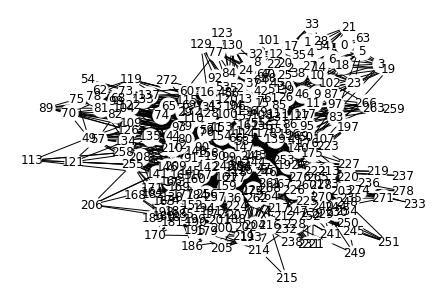

In [124]:
import networkx as nx
g = nx.from_numpy_matrix(A)
layout = nx.spring_layout(g, pos=nx.circular_layout(g))
nx.draw(g, pos=layout,
        with_labels=True, node_color='white')

You can see that the nodes fall naturally into two groups: (0, 1, 2) and (3, 4, 5).
Can the Fiedler vector tell us this? First, we must compute the **degree matrix**
and the **Laplacian**. 

We first get the degrees by summing along either axis of $A$.
(Either axis works because $A$ is symmetric.)

In [125]:
d = np.sum(A, axis=0)
print(d)

[  0.   1.   6.   7.  18.   0.  19.  13.   6.   7.  25.   4.   6.   3.
  49.  29.  10.   3.  21.   5.  10.   5.  24.  14.   6.  20.   4.  61.
  21.  10.  12.  14.  24.   5.  27.  15.  21.  14.  31.  12.  71.  17.
  40.  14.   4.  70.  11. 350. 112.  26.  14.  47.  16.  47.  13. 325.
  97.  18. 113.   7.  13.  46.  18.   5.  34.   9. 113.  71.  15.  18.
   6.  25.   5.   5.  10.   3.  14.  10.  10.  80.  20.  15.   9.  14.
  12.  51.  22.  17.  71.   3.  23.  18.  15.  91.  71.  13. 151.  11.
  14.  40.  17.   6.  15.  52.  16. 177.  73.  13.  68.  62.  25.  24.
  64.   3.  79.  16.  79.  21.  76.   5.  24.   4.   6.   5.  38.  28.
  71.  22.  46.   8.   9.  28.  66.  49.   2.   5.  19.  45.  21.  40.
  79.  46.  30.  13.   7.  17.  54.  33.  13.  12.  20.  13.  16.  16.
  14.  47.  21.  16.  10.  14.  18.  31.  55. 111.  12.  16.  83.  34.
  80.  26.   7.  11.  24.  23.  84.  17.  14.  25.   8.  11.  16. 114.
  12.  76.  30.  16.   9.  18.  17.   8.  78.  21.   6.  10.  28. 123.
   7. 

We then put those degrees into a diagonal matrix of the same shape
as A, the *degree matrix*. We can use the `np.diag` function to do this.

We did this exercise in our ecology graph, remember?

In [126]:
D = np.diag(d)
print(D)

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  1.  0. ...  0.  0.  0.]
 [ 0.  0.  6. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  6.  0.  0.]
 [ 0.  0.  0. ...  0. 16.  0.]
 [ 0.  0.  0. ...  0.  0.  3.]]


Finally, we get the Laplacian from the definition:

In [127]:
L = D - A
print(L)

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  1. -1. ...  0.  0.  0.]
 [ 0.  0.  6. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  6.  0.  0.]
 [ 0.  0.  0. ...  0. 16.  0.]
 [ 0.  0.  0. ...  0.  0.  3.]]


Because $L$ is symmetric, we can use the `np.linalg.eigh` function (returns the eigenvalues and eigenvectors of a Hermitian or symmetric matrix, see [here](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.eigh.html)) to compute
the eigenvalues and eigenvectors:

In [128]:
val, Vec = np.linalg.eigh(L)
val, Vec

(array([-1.0595699e+01, -5.5400753e+00, -3.1556644e+00, -2.7215073e+00,
        -2.0189955e+00, -2.0017467e+00, -1.7850863e+00, -1.3029902e+00,
        -1.0840538e+00, -8.8524526e-01, -6.4841580e-01, -4.3921179e-01,
        -2.3453608e-01, -3.6246615e-15,  0.0000000e+00,  1.8975973e-01,
         8.1357163e-01,  9.4530827e-01,  1.1562667e+00,  1.3107412e+00,
         1.8202387e+00,  1.8645947e+00,  2.0290112e+00,  2.3292062e+00,
         2.3893256e+00,  2.4022779e+00,  2.4528534e+00,  2.5319452e+00,
         2.6059523e+00,  2.7577782e+00,  2.8389637e+00,  2.8658373e+00,
         2.8857062e+00,  3.0864942e+00,  3.2713082e+00,  3.4226484e+00,
         3.7374353e+00,  3.7868989e+00,  3.8553507e+00,  3.9773219e+00,
         4.1838984e+00,  4.3398881e+00,  4.4405303e+00,  4.5132136e+00,
         4.5999565e+00,  4.6420116e+00,  4.6777430e+00,  4.8060718e+00,
         4.8326464e+00,  4.9993343e+00,  5.0990200e+00,  5.2341557e+00,
         5.3293543e+00,  5.4417200e+00,  5.5889163e+00,  5.63342

You can verify that the values returned satisfy the definition of eigenvalues
and eigenvectors. For example, one of the eigenvalues is 3.

- Marvel at this ***neat*** pythonic expression for verifying that a list contains a value very close to something we're after:

In [129]:
# isn't this a neat pythonic expression for verifying that a list contains a value very close to something we know?
np.any(np.isclose(val, 3))

False

And we can check that multiplying the matrix $L$ by the corresponding eigenvector
does indeed multiply the vector by 3:

In [130]:
idx_lambda3 = np.argmin(np.abs(val - 3))
print(idx_lambda3)
v3 = Vec[:, idx_lambda3]

print(v3)
print(L @ v3)
print(3 * v3)

33
[ 0.00000000e+00  2.38114689e-02 -6.46680146e-02 -6.87177433e-03
 -1.83054097e-02 -9.02056208e-17 -2.36117672e-02 -7.57808983e-02
 -4.21474352e-02 -3.02609447e-02 -2.66525690e-02  8.02900121e-02
  2.76071522e-02  2.44148508e-01 -2.05502491e-02  4.05943580e-03
 -1.78851117e-03  6.18259758e-02  1.15593467e-02  6.23219386e-02
  4.16071825e-02 -1.55002907e-01 -4.96824868e-02 -8.42214748e-03
  6.07714169e-02 -4.74825921e-03 -7.45523646e-02  4.40494128e-04
 -2.85294023e-04 -6.24273457e-02 -1.17474109e-01 -2.90081054e-02
 -8.48505832e-03  1.78747829e-02 -2.54410855e-03  1.21027427e-02
  9.75230802e-03 -8.72516260e-03 -4.76512033e-03 -5.74149862e-02
  5.48964716e-04 -4.12737718e-03  5.32627571e-03 -5.22598159e-04
  4.51705558e-03  1.94188766e-03  1.57308187e-02 -3.62300966e-03
 -2.20641792e-02 -3.50903608e-02 -7.22416793e-04 -3.53946351e-03
  1.45606464e-02  1.34404353e-03  1.02603093e-01 -2.46650237e-03
  2.44074669e-02  1.58496220e-02 -1.75636227e-03 -1.27221765e-02
 -1.06425568e-01  2.26

In [131]:
print(idx_lambda3)
v3 = Vec[:, idx_lambda3]
print(v3)
print(Vec[0, idx_lambda3])

33
[ 0.00000000e+00  2.38114689e-02 -6.46680146e-02 -6.87177433e-03
 -1.83054097e-02 -9.02056208e-17 -2.36117672e-02 -7.57808983e-02
 -4.21474352e-02 -3.02609447e-02 -2.66525690e-02  8.02900121e-02
  2.76071522e-02  2.44148508e-01 -2.05502491e-02  4.05943580e-03
 -1.78851117e-03  6.18259758e-02  1.15593467e-02  6.23219386e-02
  4.16071825e-02 -1.55002907e-01 -4.96824868e-02 -8.42214748e-03
  6.07714169e-02 -4.74825921e-03 -7.45523646e-02  4.40494128e-04
 -2.85294023e-04 -6.24273457e-02 -1.17474109e-01 -2.90081054e-02
 -8.48505832e-03  1.78747829e-02 -2.54410855e-03  1.21027427e-02
  9.75230802e-03 -8.72516260e-03 -4.76512033e-03 -5.74149862e-02
  5.48964716e-04 -4.12737718e-03  5.32627571e-03 -5.22598159e-04
  4.51705558e-03  1.94188766e-03  1.57308187e-02 -3.62300966e-03
 -2.20641792e-02 -3.50903608e-02 -7.22416793e-04 -3.53946351e-03
  1.45606464e-02  1.34404353e-03  1.02603093e-01 -2.46650237e-03
  2.44074669e-02  1.58496220e-02 -1.75636227e-03 -1.27221765e-02
 -1.06425568e-01  2.26

Ok, great.

As mentioned above, the **Fiedler vector** is the vector corresponding to the
second-smallest eigenvalue of $L$. Sorting the eigenvalues tells us which one
is the *second-smallest*:

[-1.0595699e+01 -5.5400753e+00 -3.1556644e+00 -2.7215073e+00
 -2.0189955e+00 -2.0017467e+00 -1.7850863e+00 -1.3029902e+00
 -1.0840538e+00 -8.8524526e-01 -6.4841580e-01 -4.3921179e-01
 -2.3453608e-01 -3.6246615e-15  0.0000000e+00  1.8975973e-01
  8.1357163e-01  9.4530827e-01  1.1562667e+00  1.3107412e+00
  1.8202387e+00  1.8645947e+00  2.0290112e+00  2.3292062e+00
  2.3893256e+00  2.4022779e+00  2.4528534e+00  2.5319452e+00
  2.6059523e+00  2.7577782e+00  2.8389637e+00  2.8658373e+00
  2.8857062e+00  3.0864942e+00  3.2713082e+00  3.4226484e+00
  3.7374353e+00  3.7868989e+00  3.8553507e+00  3.9773219e+00
  4.1838984e+00  4.3398881e+00  4.4405303e+00  4.5132136e+00
  4.5999565e+00  4.6420116e+00  4.6777430e+00  4.8060718e+00
  4.8326464e+00  4.9993343e+00  5.0990200e+00  5.2341557e+00
  5.3293543e+00  5.4417200e+00  5.5889163e+00  5.6334238e+00
  5.7215953e+00  5.7355566e+00  5.8400350e+00  5.8795710e+00
  6.0292325e+00  6.0734277e+00  6.4252295e+00  6.4829431e+00
  6.5826578e+00  6.82946

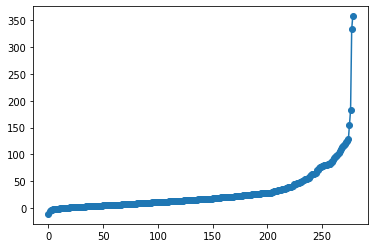

In [132]:
val2 = np.sort(val)
print(val2)
plt.plot(val2, linestyle='-', marker='o');

<!-- caption text="Eigenvalues of $L$" -->

It's the first non-zero eigenvalue, close to 0.4. The Fiedler vector is the
corresponding eigenvector. These are its components:

[ 0.00000000e+00 -5.21499780e-04 -6.26671081e-03  1.52184640e-03
  6.40236191e-04  6.59194921e-17  2.82239052e-04 -3.12005053e-03
 -2.67307297e-03 -2.33086944e-03 -2.65331101e-03 -7.38665869e-04
 -1.67211238e-03 -2.10936787e-03 -1.41804718e-04 -1.20955927e-03
 -6.85226452e-03 -4.27749765e-04  1.10220700e-03 -5.43256290e-04
  6.14713144e-06 -1.04999496e-03 -3.41064786e-03  4.50634444e-03
  3.84278857e-04 -1.35198829e-03 -2.12606136e-03  4.67457256e-04
  4.47433675e-04 -5.60981862e-04 -5.32080606e-03 -7.16886832e-04
 -1.11772143e-03 -1.16195304e-04 -3.87715903e-04  1.61343708e-03
 -5.05812978e-03 -2.63322634e-03  3.88875580e-03 -6.75886869e-03
 -1.86741259e-03  5.83240483e-03 -3.29748518e-03 -6.06548972e-04
 -3.57250473e-03 -2.59922259e-03 -2.12293887e-03 -2.35425420e-02
 -5.71937719e-03 -6.66459184e-03  2.59464653e-03 -3.55993607e-03
 -1.86967023e-03 -2.89433450e-03 -4.68490645e-03 -2.66405642e-02
 -4.24946379e-03 -5.91622526e-03 -7.65089132e-03 -1.86907053e-02
 -1.75753552e-02 -1.47618

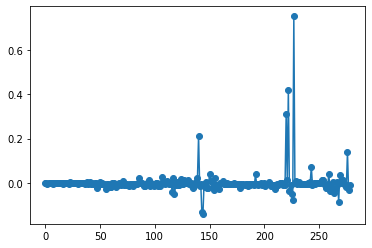

In [133]:
f = Vec[:, np.argsort(val)[1]]
print(f)
plt.plot(f, linestyle='-', marker='o');

<!-- caption text="Fiedler vector of $L$" -->

Just by looking at the *sign* of the elements of the Fiedler
vector, we can separate the nodes into the two groups we identified in the
drawing. 

That's pretty remarkable!

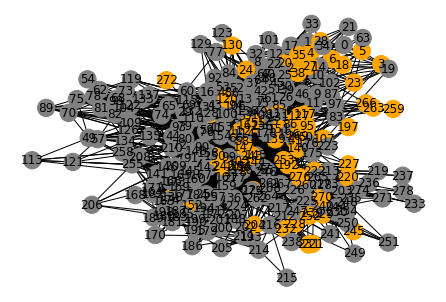

In [134]:
colors = ['orange' if eigv > 0 else 'gray' for eigv in f]
nx.draw(g, pos=layout, with_labels=True, node_color=colors)

</br >
<center>
<img src="ipynb.images/lemur.png" width=200 />
    (speechless)
</center>

Right?!

Now, ready for a *real* network?

<!-- caption text="Nodes colored by their sign in the Fiedler vector of $L$" -->

# Laplacians with brain data

Armed with this newly acquired knowledge, and since we're getting close to building artificial neural networks with `scikit-learn`, we need to learn a bit more about how neurons are ***configured***. 

Let's demonstrate this process in a real-world example by laying out a worm's brain cells (one of the simplest brains in our animal kingdom), as shown in Figure 2
from the
[Varshney *et al* paper](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1001066)
(information on
how to do this is in the
[supplementary material](http://journals.plos.org/ploscompbiol/article/asset?unique&id=info:doi/10.1371/journal.pcbi.1001066.s001)
for the paper).

</br >
<center>
<img src="ipynb.images/worm.png" width=300 />
</center>


To obtain Varshney's layout of the worm brain neurons, they used a related matrix, the
**degree-normalized Laplacian**.

Because the order of the neurons is important in this analysis, we will use a
preprocessed dataset, rather than do complex data cleansing. The original data is on Varshney's
[website](http://www.ifp.illinois.edu/~varshney/elegans),
and the processed data is on blackboard.

First, load the data. There are four components:
- The network of chemical synapses, through which a *pre-synaptic neuron*
  sends a **chemical** signal to a *post-synaptic* neuron (chem-network.npy),
- The gap junction network, which contains direct **electrical** contacts between
  neurons) (gap-network.npy),
- The neuron IDs (names) (neurons.npy), and
- The three neuron types (neuron-types.npy):
  - *sensory neurons*, those that detect signals coming from the outside world,
    encoded as 0;
  - *motor neurons*, those that activate muscles, enabling the worm to move,
    encoded as 2; and
  - *interneurons*, the neurons in between, which enable complex signal processing
    to occur between sensory neurons and motor neurons, encoded as 1.
    
These are the most important figures in the paper. Here is Figure 1, scatter pairs plots:

<br />
<center>
<img src="ipynb.images/worm-fig1.png" width=900 />
    Figure 1. Adjacency matrices for the gap junction network (blue circles) and the chemical synapse network (red points) with neurons grouped by category (sensory neurons, interneurons, motor neurons)
</center>

<br />
And here are the two views of Figure 2:

<br />
<center>
<img src="ipynb.images/worm-fig2.png" width=900 />
    Figure 2. The C. elegans wiring diagram is a network of identifiable, labeled neurons connected by chemical and electrical synapses
</center>

<br />

Here's a [neuron](https://en.wikipedia.org/wiki/Neuron). Chemical transmission happens in the synapses. Electrical transmission happens in the axon. For worms and humans alike!
    
<br />
<center>
<img src="ipynb.images/neuron.png" width=500 />
</center>

<br />
Let's load the data.

A `.npy` file is the `NumPy` **array file** we already know about. We know that we can load the array in a `.npy` file by using 
```python
np.load('filename.npy')
```

In [135]:
import numpy as np
Chem = np.load('data/chem-network.npy')
Gap = np.load('data/gap-network.npy')
neuron_ids = np.load('data/neurons.npy')
neuron_types = np.load('data/neuron-types.npy')

Let's simplify the network, adding the two kinds of connections together,
and removing the directionality of the network by taking the average of
in-connections and out-connections of neurons (adding by the transpose of the adjacency matrix, and then dividing by 2 achieves this):
```python
(A + A.T) / 2
```

Why? Since we are only looking for the *layout* of the neurons on a graph, we
only care about *whether* neurons are connected, not in which direction.

We are going to call the resulting matrix the **connectivity matrix**, $C$, which
is just a different kind of **adjacency matrix**. Note that the adjacency matrix A is **weighted**.

In [136]:
A = Chem + Gap
C = (A + A.T) / 2

In [137]:
import pandas as pd
pd.DataFrame(C)

,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,274,275,276,277,278
0,0.0,0.0,0.0,1.5,0.0,0.0,3.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.5,0.0,3.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,3.5,0.0,0.0,0.0,0.0,0.0,1.0,1.5,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,1.0
275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0


To get the Laplacian matrix $L$, we need the degree matrix $D$, which contains
the degree of node i at position [i, i], and zeros everywhere else.

In [138]:
degrees = np.sum(C, axis=0)
D = np.diag(degrees)

Now, we can get the Laplacian just like before:

In [139]:
L = D - C
np.shape(L)

(279, 279)

Let's do some **exploratory data analysis** (EDA):

In [140]:
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix

def plot_coo_matrix(m):
    if not isinstance(m, coo_matrix):
        m = coo_matrix(m)
    fig, ax = plt.subplots(figsize=(10, 5))
    #fig = plt.figure()
    #fig = plt.figure(figsize=(2,1))
    # you may have to replace 'axisbg' below with 'facecolor', depending on the version of your matplotlib
    ax = fig.add_subplot(111, facecolor='black') #axisbg='b')
    ax.plot(m.col, m.row, 's', color='white', ms=1)
    ax.set_xlim(0, m.shape[1])
    ax.set_ylim(0, m.shape[0])
    ax.set_aspect('equal')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

C:\Users\liaoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


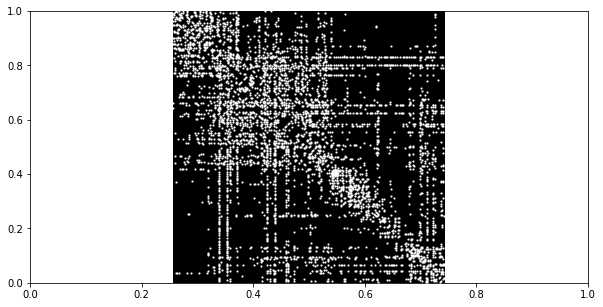

In [141]:
ax = plot_coo_matrix(C)
ax.figure.show()

So, what are some of the conclusions you can make by looking at this brain? How about this:

* Neurons appear to like to connect to nearby neurons (dense diagonal)
* But when a neuron connects to far-away neurons, it connects *a ton* to all other neurons (horizontal and vertical lines)

Let's do some virtual surgery and take some brain slices.

</br >
<center>
<img src="ipynb.images/virtual-brain-surgery.jpg" width=500 />
</center>

C:\Users\liaoz\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


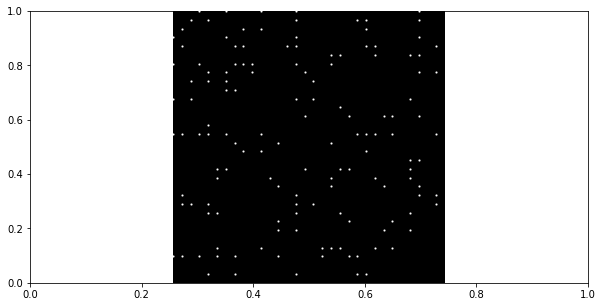

In [142]:
from skimage.util.shape import view_as_blocks
B = view_as_blocks(C, block_shape=(31, 31))  #why 31? Ask the authors..

B00 = B[0, 0] #the top-left 31x31 block
ax = plot_coo_matrix(B00)
ax.figure.show()

In [143]:
# from last lecture
for i in range(31):
    row = []
    for el in B00[i]:
        row.append(int(round(el)))
    deg = np.sum(row)
    print(''.join(str(i) for i in row).replace(' ', '').replace('\n', '') + ' ' + str(deg))

0002004000100050000000000000200 14
0000400000000060000002100000100 14
0000000000200000000000400000000 6
2000001000000020000000000000000 5
0400000120000120000000110000001 13
0000000000000000004200000006100 13
4001000120000010001000000000000 10
0000101000000002000000000000104 9
0000202000000000000000000000000 4
0000000000000000000000000000000 0
1020000000000000100000000000000 4
0000000000000000000000000000000 0
0000000000000002000000001100100 5
0000100000000000000000000000000 1
5602201000000000000002010000000 19
0000000200002000002000000000000 6
0000000000100000000000100000000 2
0000000000000000000000000008200 10
0000041000000002000020000002000 11
0000020000000000000000000002000 4
0000000000000000002000002000100 5
0200000000000020000000000000001 5
0140100000000000100000000000004 11
0000100000000010000000000001000 3
0000000000001000000020000100000 4
0000000000001000000000001000000 2
0000000000000000000000000000000 0
0000060000000000082200010000000 19
2100010100001000020010000000000 9
0000

Let's rearrange nodes such that, on average, neurons are as close as possible to "just above" their downstream (connected)
neighbors. Varshney _et al_ call this measure **processing depth**, and it's
obtained by solving a linear equation involving the Laplacian. We use
`scipy.linalg.pinv`, the
[pseudoinverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_pseudoinverse),
to solve it. 

That is because when the dimensions get high (we have 279 here), there is a ***high probability of matrix degeneracy***. Calculating a pseudo-inverse is safer and faster!

If we denote by $A^+$ the pseudo-inverse (versus $A^{-1}$ for the real inverse), $AA^+$ need not be the general identity matrix, but it maps all column vectors of A to themselves: 

$$AA^+ = A$$

Now, let's use the pseudo-inverse `linalg.pinv` to compute a
vector $z$ that satisfies $L z = b$,
where $b = C \odot \textrm{sign}\left(A - A^T\right) \mathbf{1}$. 

- Why, is in the supplementary material for Varshney *et al*.

So, $z = L^+b$.

In [144]:
from scipy import linalg
b = np.sum(C * np.sign(A - A.T), axis=1) 
z = linalg.pinv(L) @ b

In order to obtain the degree-normalized Laplacian, $Q$, we need the inverse
square root of the matrix $D$ formed by putting the degree for each node on its diagonal:

In [145]:
Dinv2 = np.diag(1 / np.sqrt(degrees))

Finally, we are able to extract the $x$ coordinates (so-called **affinity coordinates**) of the neurons to ensure that
highly-connected neurons remain close: the eigenvector of $Q$ corresponding to
its second-smallest eigenvalue (**Fiedler vector**), normalized by the degrees:

In [146]:
Q = Dinv2 @ L @ Dinv2

In [147]:
val, Vec = linalg.eig(Q)

Note from the documentation of `numpy.linalg.eig`:

> "The eigenvalues are not necessarily ordered."

We must therefore sort the eigenvalues and the corresponding eigenvector columns ourselves:

In [148]:
smallest_first = np.argsort(val)
val = val[smallest_first]
Vec = Vec[:, smallest_first]

In [149]:
val

array([-5.2154064e-08+0.j,  1.1612537e-01+0.j,  1.9348751e-01+0.j,
        2.2782911e-01+0.j,  2.6494110e-01+0.j,  2.8061098e-01+0.j,
        3.1124058e-01+0.j,  3.3830497e-01+0.j,  3.5364634e-01+0.j,
        3.6151758e-01+0.j,  3.6549637e-01+0.j,  3.7994432e-01+0.j,
        3.9513358e-01+0.j,  4.0380445e-01+0.j,  4.1093394e-01+0.j,
        4.3729949e-01+0.j,  4.4752398e-01+0.j,  4.5978439e-01+0.j,
        4.6602601e-01+0.j,  4.7838467e-01+0.j,  4.9290869e-01+0.j,
        5.2604228e-01+0.j,  5.2976620e-01+0.j,  5.3720772e-01+0.j,
        5.4116946e-01+0.j,  5.5283642e-01+0.j,  5.5324918e-01+0.j,
        5.6047624e-01+0.j,  5.6888765e-01+0.j,  5.8428729e-01+0.j,
        5.9341609e-01+0.j,  6.0225701e-01+0.j,  6.1064982e-01+0.j,
        6.1778468e-01+0.j,  6.2792951e-01+0.j,  6.3102639e-01+0.j,
        6.3329029e-01+0.j,  6.4234710e-01+0.j,  6.5244681e-01+0.j,
        6.5958166e-01+0.j,  6.6352570e-01+0.j,  6.7938489e-01+0.j,
        6.9307679e-01+0.j,  6.9808632e-01+0.j,  7.0232075e-01+

Now that we found the Fielder eigenvector, we compute the **affinity coordinates**:

In [150]:
x = Dinv2 @ Vec[:, 1]
x

array([-0.02154603, -0.02182955, -0.0166935 , -0.01842129, -0.0195659 ,
       -0.0225139 , -0.01895578, -0.01242107, -0.01771765, -0.01358305,
       -0.01611597, -0.0118765 , -0.01791035, -0.01131234, -0.0198679 ,
       -0.01378847, -0.01146096, -0.02265312, -0.01996965, -0.01998017,
       -0.01823626, -0.02168174, -0.01599226, -0.01692315, -0.01478643,
       -0.01579603, -0.01159788, -0.02135016, -0.02100617, -0.0096885 ,
       -0.01378199, -0.00951281, -0.01855687, -0.02290469, -0.02199838,
       -0.02105565,  0.01096086, -0.01494428, -0.01715326, -0.01373883,
       -0.01728185, -0.00366178, -0.01463244, -0.01047713, -0.00130267,
       -0.01632306, -0.01386729,  0.00786199, -0.01507828, -0.00768728,
       -0.0036556 , -0.01483359, -0.01384239, -0.01462624, -0.01451204,
        0.0076324 , -0.01545885, -0.00581739, -0.00235185, -0.00377118,
       -0.0126224 , -0.01381079, -0.01445311, -0.01304167, -0.01716464,
       -0.01098511, -0.00345637, -0.01691684, -0.0131336 , -0.01

The reasons for using this vector are complex, but appear in
the paper's supplementary material. The important result is that
***choosing this vector minimizes the total length of the links between neurons, and yields pretty graphs that are easier to analyze***.

There is one small kink that the authors address before proceeding: eigenvectors
are only defined up to a multiplicative constant. This follows simply from the
definition of an eigenvector: suppose $v$ is an eigenvector of the matrix $M$,
with corresponding eigenvalue $\lambda$. Then $\alpha v$ is also an eigenvector
of $M$ for any scalar number $\alpha$,
because $Mv = \lambda v$ implies $M(\alpha v) = \lambda (\alpha v)$.

So, it is
arbitrary whether a software package returns $v$ or $-v$ when asked for the
eigenvectors of $M$. In order to make sure we reproduce the layout from the
Varshney *et al.* paper, we must make sure that the vector is pointing in the
same direction as theirs, rather than the opposite direction. 

So we choose an arbitrary neuron from their Figure 2, and check the sign of `x`
at that position. Reverse the vector it if it doesn't match its sign in Figure 2
of the paper.

In [151]:
vc2_index = np.argwhere(neuron_ids == 'VC02')
if x[vc2_index] < 0:
    x = -x

Now it's just a matter of drawing the nodes and the edges. We color them
according to the type stored in `neuron_types`, using the appealing and
functional "colorblind"
[colorbrewer palette](http://chrisalbon.com/python/seaborn_color_palettes.html):

In [152]:
from matplotlib.colors import ListedColormap
from matplotlib.collections import LineCollection


def plot_connectome(x_coords, y_coords, conn_matrix, *,
                    labels=(), types=None, type_names=('',),
                    xlabel='', ylabel=''):
    """Plot neurons as points connected by lines.

    Neurons can have different types (up to 6 distinct colors).

    Parameters
    ----------
    x_coords, y_coords : array of float, shape (N,)
        The x-coordinates and y-coordinates of the neurons.
    conn_matrix : array or sparse matrix of float, shape (N, N)
        The connectivity matrix, with non-zero entry (i, j) if and only
        if node i and node j are connected.
    labels : array-like of string, shape (N,), optional
        The names of the nodes.
    types : array of int, shape (N,), optional
        The type (e.g. sensory neuron, interneuron) of each node.
    type_names : array-like of string, optional
        The name of each value of `types`. For example, if a 0 in
        `types` means "sensory neuron", then `type_names[0]` should
        be "sensory neuron".
    xlabel, ylabel : str, optional
        Labels for the axes.
    """
    if types is None:
        types = np.zeros(x_coords.shape, dtype=int)
    ntypes = len(np.unique(types))
    colors = plt.rcParams['axes.prop_cycle'][:ntypes].by_key()['color']
    cmap = ListedColormap(colors)

    fig, ax = plt.subplots()

    # plot neuron locations:
    for neuron_type in range(ntypes):
        plotting = (types == neuron_type)
        pts = ax.scatter(x_coords[plotting], y_coords[plotting],
                         c=cmap(neuron_type), s=4, zorder=1)
        pts.set_label(type_names[neuron_type])

    # add text labels:
    for x, y, label in zip(x_coords, y_coords, labels):
        ax.text(x, y, '   ' + label,
                verticalalignment='center', fontsize=3, zorder=2)

    # plot edges
    pre, post = np.nonzero(conn_matrix)
    links = np.array([[x_coords[pre], x_coords[post]],
                      [y_coords[pre], y_coords[post]]]).T
    ax.add_collection(LineCollection(links, color='lightgray',
                                     lw=0.3, alpha=0.5, zorder=0))

    ax.legend(scatterpoints=3, fontsize=6)

    ax.set_xlabel(xlabel, fontsize=8)
    ax.set_ylabel(ylabel, fontsize=8)

    plt.figure(figsize=(20,10))
    plt.show()

Now, let's use that function to plot the neurons:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


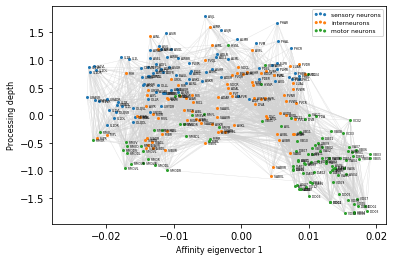

<Figure size 1440x720 with 0 Axes>

In [153]:
# Spectral layout of the neurons of a nematode worm
plot_connectome(x, z, C, labels=neuron_ids, types=neuron_types,
                type_names=['sensory neurons', 'interneurons',
                            'motor neurons'],
                xlabel='Affinity eigenvector 1', ylabel='Processing depth')

That's a worm brain!

As discussed in Varshney's original paper, you can see the top-down processing from
sensory neurons to motor neurons through a network of interneurons. You can
also see two distinct groups of motor neurons: these correspond to the neck
(left) and body (right) body segments of the worm.

How to modify the above code to show the affinity view in Figure 2B from the paper?

In the affinity view, instead of using the processing depth on the y-axis,
we use the normalized third eigenvector of Q, just like we did with x (
invert if necessary, just like with x).

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


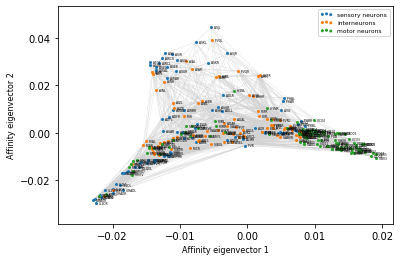

<Figure size 1440x720 with 0 Axes>

In [154]:
y = Dinv2 @ Vec[:, 2]
asjl_index = np.argwhere(neuron_ids == 'ASJL')
if y[asjl_index] < 0:
    y = -y

# Spectral layout of the neurons of a nematode worm, using two spectral dimensions
plot_connectome(x, y, C, labels=neuron_ids, types=neuron_types,
                type_names=['sensory neurons', 'interneurons',
                            'motor neurons'],
                xlabel='Affinity eigenvector 1',
                ylabel='Affinity eigenvector 2')

# Using sparse matrix calculus

Let's repeat these operations with sparse matrix calculus.

First, we start with the adjacency matrix, A, in a sparse matrix format, in
this case, **CSR** (compressed sparse row), which is the most common format for linear algebra. 

We'll append `s` to the names of all the matrices to indicate that they are **sparse**.

In [155]:
from scipy import sparse
import scipy.sparse.linalg

As = sparse.csr_matrix(A)

Create our connectivity matrix in the same way:

In [156]:
Cs = (As + As.T) / 2

In order to get the degrees matrix, we use the "diags" sparse format, which
stores diagonal and off-diagonal matrices.

In [157]:
degrees = np.ravel(Cs.sum(axis=0))
Ds = sparse.diags(degrees)

Getting the Laplacian is straightforward:

In [158]:
Ls = Ds - Cs

Now we want to get the processing depth. Remember that getting the
pseudo-inverse of the Laplacian matrix for large connectomes is out of the question, because it will
be a dense matrix (the inverse of a sparse matrix is not generally sparse
itself). 

For the nematode worm, we used the pseudo-inverse to compute a
vector $z$ that satisfies $L z = b$,
where $b = C \odot \textrm{sign}\left(A - A^T\right) \mathbf{1}$.

With
dense matrices, we can simply use $z = L^+b$. With sparse ones, we can
use one of the *solvers* (see sidebox, "Solvers") in `sparse.linalg.isolve` to get the `z` vector after
providing `L` and `b`, with no inversion required.

In [159]:
b = Cs.multiply((As - As.T).sign()).sum(axis=1)
z, error = sparse.linalg.isolve.cg(Ls, b, maxiter=10000)

Finally, we must find the eigenvectors of $Q$, the degree-normalized Laplacian,
corresponding to its second and third smallest eigenvalues.

Numerical data in sparse matrices is
in the `.data` attribute. We use that to invert the degrees matrix:

In [160]:
Dsinv2 = Ds.copy()
Dsinv2.data = 1 / np.sqrt(Ds.data)

Finally, we use `scipy`'s sparse linear algebra functions to find the desired
eigenvectors. 

The $Q$ matrix is symmetric, so we can use the `eigsh` function,
specialized for symmetric matrices, to compute them. 

We use the `which` keyword
argument to specify that we want the eigenvectors corresponding to the smallest
eigenvalues, and `k` to specify that we need the 3 smallest:

In [161]:
Qs = Dsinv2 @ Ls @ Dsinv2
vals, Vecs = sparse.linalg.eigsh(Qs, k=3, which='SM')
sorted_indices = np.argsort(vals)
Vecs = Vecs[:, sorted_indices]

Finally, we normalize the eigenvectors to get the x and y coordinates
(and flip these if necessary):

In [162]:
_dsinv, x, y = (Dsinv2 @ Vecs).T
if x[vc2_index] < 0:
    x = -x
if y[asjl_index] < 0:
    y = -y

Note that the eigenvector corresponding to the smallest eigenvalue is always a
vector of all ones. Why? Study [this](http://blog.shriphani.com/2015/04/06/the-smallest-eigenvalues-of-a-graph-laplacian/) paper!

We can now reproduce the above plots!

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


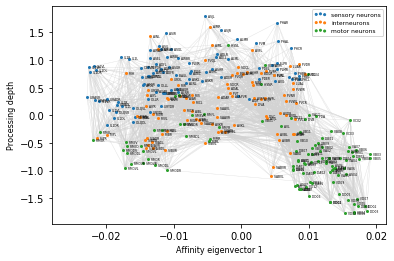

<Figure size 1440x720 with 0 Axes>

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


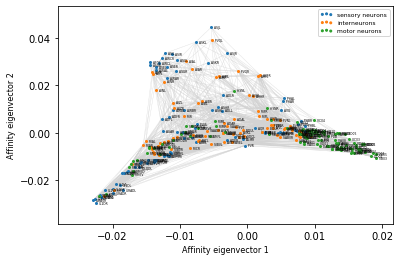

<Figure size 1440x720 with 0 Axes>

In [163]:
# Spectral layout of a nematode brain, computed using sparse matrices
plot_connectome(x, z, C, labels=neuron_ids, types=neuron_types,
                type_names=['sensory neurons', 'interneurons',
                            'motor neurons'],
                xlabel='Affinity eigenvector 1', ylabel='Processing depth')

plot_connectome(x, y, C, labels=neuron_ids, types=neuron_types,
                type_names=['sensory neurons', 'interneurons',
                            'motor neurons'],
                xlabel='Affinity eigenvector 1',
                ylabel='Affinity eigenvector 2')

SciPy has several sparse iterative solvers available, and it is not always
obvious which to use.  Unfortunately, that question also has no easy answer:
different algorithms have different strengths in terms of speed of
convergence, stability, accuracy, and memory use (amongst others).  It is also
not possible to predict, by looking at the input data, which algorithm will
perform best.

Here is a rough guideline for choosing an iterative solver:

> - If A, the input matrix, is symmetric and positive definite, use the
>   Conjugate Gradient solver `cg`.  If A is symmetric, but
>   near-singular or indefinite, try the Minimum Residual iteration
>   method `minres`.
> 
> - For non-symmetric systems, try the Biconjugate Gradient Stabilized
>   method, `bicgstab`.  The Conjugate Gradient Squared method, `cgs`,
>   is a bit faster, but has more erratic convergence.
> 
> - If you need to solve many similar systems, use the LGMRES algorithm `lgmres`.
> 
> - If A is not square, use the least squares algorithm `lsmr`.
> 

For further reading, see:
 
**How Fast are Nonsymmetric Matrix Iterations?**,
Noël M. Nachtigal, Satish C. Reddy, and Lloyd N. Trefethen
SIAM Journal on Matrix Analysis and Applications 1992 13:3, 778-795. https://pdfs.semanticscholar.org/899b/d31c4b9a29b593c31ccbcd4497684eeea864.pdf
 
**Survey of recent Krylov methods**, Jack Dongarra,
http://www.netlib.org/linalg/html_templates/node50.html



### A word about [Krylov](https://en.wikipedia.org/wiki/Krylov_subspace) methods

An intuitive method for finding an eigenvalue (specifically the largest eigenvalue) of a given m × m matrix $A$ is the power iteration that we used last lecture. 

Starting with a **random initial vector** $b$, this method calculates $Ab, \; A^2b, \; A^3b$,… iteratively storing and normalizing the result into $b$ on every turn. This sequence **converges** to the eigenvector corresponding to the largest eigenvalue,$ \lambda _{{1}}$: the **dominant eigenvector**. However, much potentially useful computation is wasted by using only the final result, $A^{n-1}b, \;  A^{{n-1}}b, \; \cdots$. 

If instead, we form the so-called Krylov matrix:

$$K_{n}= \begin{bmatrix}b&Ab&A^{2}b&\cdots &A^{n-1}b\end{bmatrix}$$

The columns of this matrix are not orthogonal, but in principle, we can extract an orthogonal basis, via a method such as [Gram–Schmidt orthogonalization](https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process). 

The resulting set of vectors is an orthogonal basis of the Krylov subspace, $K_{n}$. We may expect the vectors of this basis to give good approximations of the eigenvectors corresponding to the $n$ largest eigenvalues, for the same reason that $A^{{n-1}}b$ approximates the dominant eigenvector.

The process described above is intuitive. Unfortunately, it is also unstable. This is where iterations such as the [Arnoldi iteration](https://en.wikipedia.org/wiki/Arnoldi_iteration) is relevant.

# Conclusion

</br >
<center>
<img src="ipynb.images/fun.png" width=400 />
</center>

I had an idea to underscore the utility of eigenvectors, introduce graph and surface visualizations, and showcase the [graph Laplacian](https://samidavies.wordpress.com/2016/09/20/whats-up-with-the-graph-laplacian/) because it is very much in vogue in deep learning today, and a good application of linear algebra.

Please read [this](https://csustan.csustan.edu/~tom/Clustering/GraphLaplacian-tutorial.pdf) concise introduction for an idea, and [this](http://blog.shriphani.com/2015/04/06/the-smallest-eigenvalues-of-a-graph-laplacian/) blog for the restricted results we studied in this notebook. 

How valuable are these methods? Look [here](https://www.ibm.com/us-en/marketplace/analysts-notebook).

I also wanted to show you how sparse matrix calculus is done, and visualization tools for `scikit-learn` and artifical neural networks.

Also, to underscore that solutions to data science problems are not software packages. Instead, it is the math that solves the problem. And then you look for software packages implementing the related math. Hint: most of them are in `scipy`. And the probabilistic ones in `scikit-learn` or `pymc3`.

Now you know.